In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ExifTags

Create EXIF DATA of Image

In [2]:
img = Image.open('Photos/baboon.png')
exif_data = img._getexif()
if exif_data:
    for tag_id in exif_data:
        tag = ExifTags.TAGS.get(tag_id, tag_id)
        data = exif_data.get(tag_id)
        if isinstance(data, bytes):
            data = data.decode()
        print(f"{tag:25}: {data}")
else:
    print("No exif data found in the image.")

No exif data found in the image.


# Inputs percentage and image, and returns the image by adding white/gray/black border. Border size should be according to the percentage of width and height.

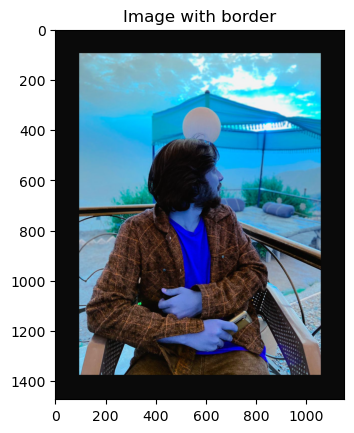

In [8]:
def add_border(percentage, image_path):
    #load image
    img = cv2.imread(image_path)
    #calculate border size
    border_size = int(min(img.shape[:2]) *  percentage/100)
    #new image with border color
    border_color = (10, 10, 10)
    new_img = cv2.copyMakeBorder(img, border_size, border_size, border_size, border_size, cv2.BORDER_CONSTANT, value=border_color)
    #show image
    plt.imshow(new_img)
    plt.title("Image with border")
    plt.show()
    
image_path = "Photos/arslan.jpg"
bordered_image = add_border(10, image_path)



# Inputs image, and resize the image with fix width size 1024 pixels and the heights should be adjust according to the aspect ratio of the image

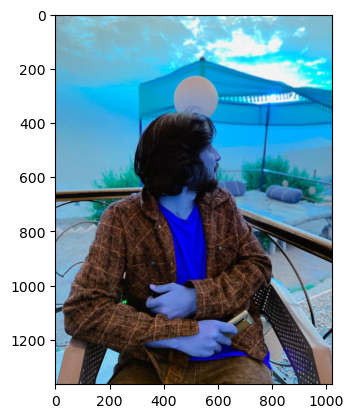

In [6]:
def resize_image(image_path):
    # Read the image
    img = cv2.imread(image_path)
    # Calculate the size of the image
    height, width = img.shape[:2]
    # Calculate the aspect ratio
    aspect_ratio = width / height
    # Set new fixed width and height according to the aspect ratio
    new_width = 1024
    new_height = int(new_width / aspect_ratio)
    # Resize the image
    resized_img = cv2.resize(img, (new_width, new_height))
    # Show the resized image
    plt.imshow(resized_img)
    plt.show()
resized_img = resize_image("Photos/arslan.jpg")



# Inputs an image and add noice on it

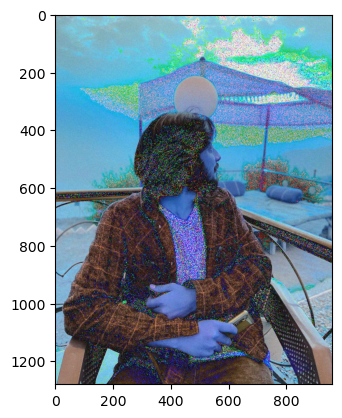

In [16]:
def add_noice():
    img = cv2.imread('Photos/arslan.jpg')
    mean = 0
    variance = 100
    sigma = np.sqrt(variance)
    noise = np.random.normal(mean, sigma, img.shape)
    noisy_img = img + noise.astype(np.uint8)
    plt.imshow(noisy_img)
    plt.show()
    return noisy_img

noisy_img = add_noice()

# Inputs an image and add blur on it

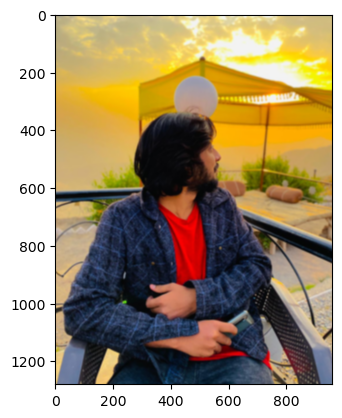

In [28]:
def add_blur(kernal_size = (7,7), sigmaX=5):
    img = cv2.imread('Photos/arslan.jpg')
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
    blurred_img = cv2.GaussianBlur(img, kernal_size, sigmaX)
    
    plt.imshow(blurred_img)
    plt.show()
add_blur()


# Inputs an image and change brightness of that image

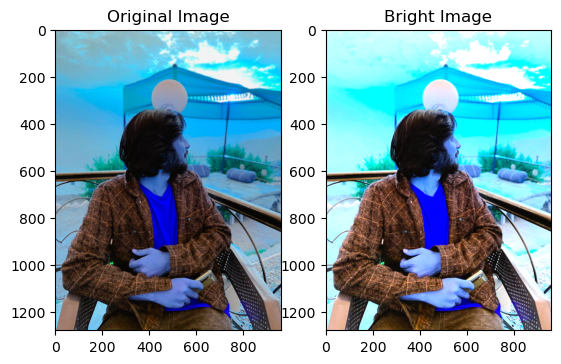

In [31]:
def bright_image():
    img = cv2.imread('Photos/arslan.jpg')
    bright_img = cv2.convertScaleAbs(img, alpha = 1.5, beta = 0)
    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.title('Original Image')
    
    plt.subplot(1, 2, 2)
    plt.imshow(bright_img)
    plt.title('Bright Image')
    plt.show()
bright_image()

Text(0.5, 1.0, 'Morphological Closing')

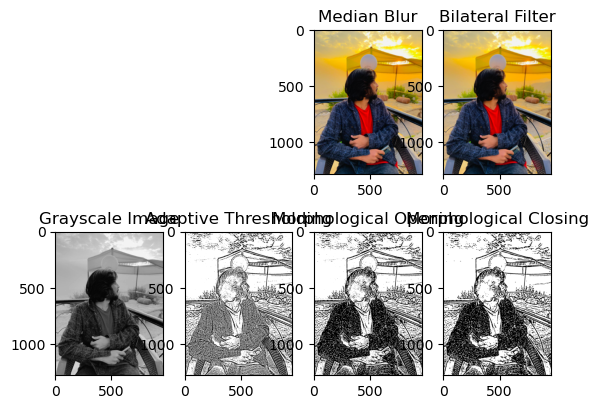

In [36]:
img = cv2.imread('Photos/arslan.jpg')
# Apply Median Blur 
img_median = cv2.medianBlur(img, 5)

# Apply Bilateral Filter 
img_bilateral = cv2.bilateralFilter(img, 9, 75, 75)

# Apply Thresholding 
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_thresh = cv2.adaptiveThreshold(img_gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)

# Apply Morphological Opening
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
img_opening = cv2.morphologyEx(img_thresh, cv2.MORPH_OPEN, kernel)

# Apply Morphological Closing
img_closing = cv2.morphologyEx(img_opening, cv2.MORPH_CLOSE, kernel)

plt.subplot(2, 4, 3)
plt.imshow(cv2.cvtColor(img_median, cv2.COLOR_BGR2RGB))
plt.title('Median Blur')

plt.subplot(2, 4, 4)
plt.imshow(cv2.cvtColor(img_bilateral, cv2.COLOR_BGR2RGB))
plt.title('Bilateral Filter')

plt.subplot(2, 4, 5)
plt.imshow(img_gray, cmap='gray')
plt.title('Grayscale Image')

plt.subplot(2, 4, 6)
plt.imshow(img_thresh, cmap='gray')
plt.title('Adaptive Thresholding')

plt.subplot(2, 4, 7)
plt.imshow(img_opening, cmap='gray')
plt.title('Morphological Opening')

plt.subplot(2, 4, 8)
plt.imshow(img_closing, cmap='gray')
plt.title('Morphological Closing')

# Problem Statement - Enhance the text in these images using OpenCV in Python

libpng warning: iCCP: known incorrect sRGB profile


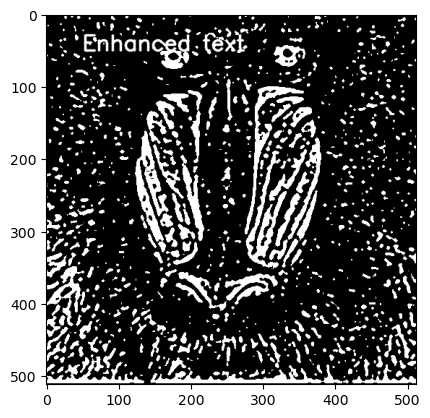

In [38]:
def enhance():
    img = cv2.imread('Photos/baboon.png')
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Thresholding
    img_thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)

    # Morphological Operation
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
    eroded = cv2.erode(img_thresh, kernel, iterations=1)
    dilated = cv2.dilate(eroded, kernel, iterations=1)

    # Apply a filter to smooths
    smoothed = cv2.medianBlur(dilated, 5)

    # Add text to the image
    cv2.putText(smoothed, "Enhanced text", (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
    
    plt.imshow(smoothed, cmap='gray')
    plt.show()

enhance()